# IMPORTIG PACKAGES

In [2]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# IMPORTING THE DATASET

In [3]:
df=pd.read_csv("basket_analysis.csv")

In [4]:
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.shape

(999, 17)

# CREATING A FREQUENT SET

In [6]:
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [8]:
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(Onion, Yogurt, chocolate)"
692,0.087087,"(Unicorn, Sugar, Yogurt)"
693,0.090090,"(Unicorn, Sugar, chocolate)"
694,0.095095,"(Sugar, Yogurt, chocolate)"


In [9]:
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [10]:
print(rules)

           antecedents          consequents  antecedent support  \
0              (Apple)              (Bread)            0.383383   
1              (Bread)              (Apple)            0.384384   
2              (Apple)             (Butter)            0.383383   
3             (Butter)              (Apple)            0.420420   
4             (Cheese)              (Apple)            0.404404   
..                 ...                  ...                 ...   
433     (Yogurt, Milk)          (chocolate)            0.190190   
434  (chocolate, Milk)             (Yogurt)            0.211211   
435           (Yogurt)    (chocolate, Milk)            0.420420   
436        (chocolate)       (Yogurt, Milk)            0.421421   
437             (Milk)  (Yogurt, chocolate)            0.405405   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.384384  0.154154    0.402089  1.046059  0.006788    1.029610   
1              0.383383  0.154154

# adding antecedent(foreruning) & consequent(foregoing)

In [11]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

In [12]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
403,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
392,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
326,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
391,"(chocolate, Dill)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
258,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
287,(Butter),"(Unicorn, Ice cream)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444,0.383420
322,(Butter),"(Yogurt, Nutmeg)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642
321,(Yogurt),"(Butter, Nutmeg)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119
371,(Yogurt),"(Kidney Beans, Corn)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881


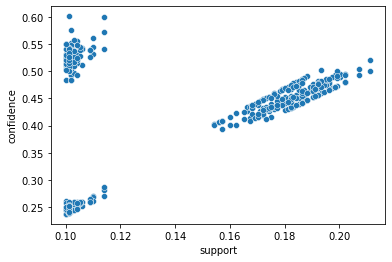

In [13]:
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

In [14]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

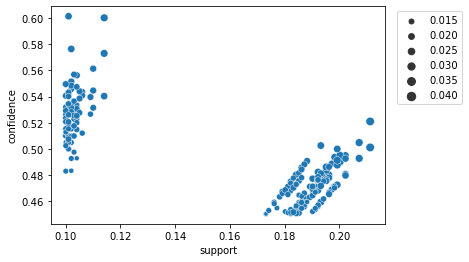

In [15]:
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [16]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

In [17]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
70,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
71,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
72,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
74,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584
75,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472


In [18]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1571138333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1571138333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1571138333.py:4: SettingWithCopyWarning: 
A value is tryi

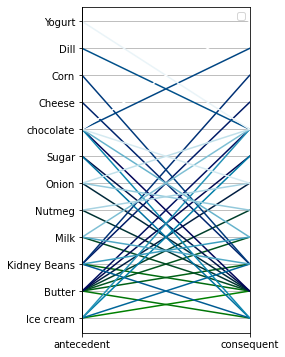

In [19]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16452\1019086969.py:9: UserWarning: Matplotlib is currently using m

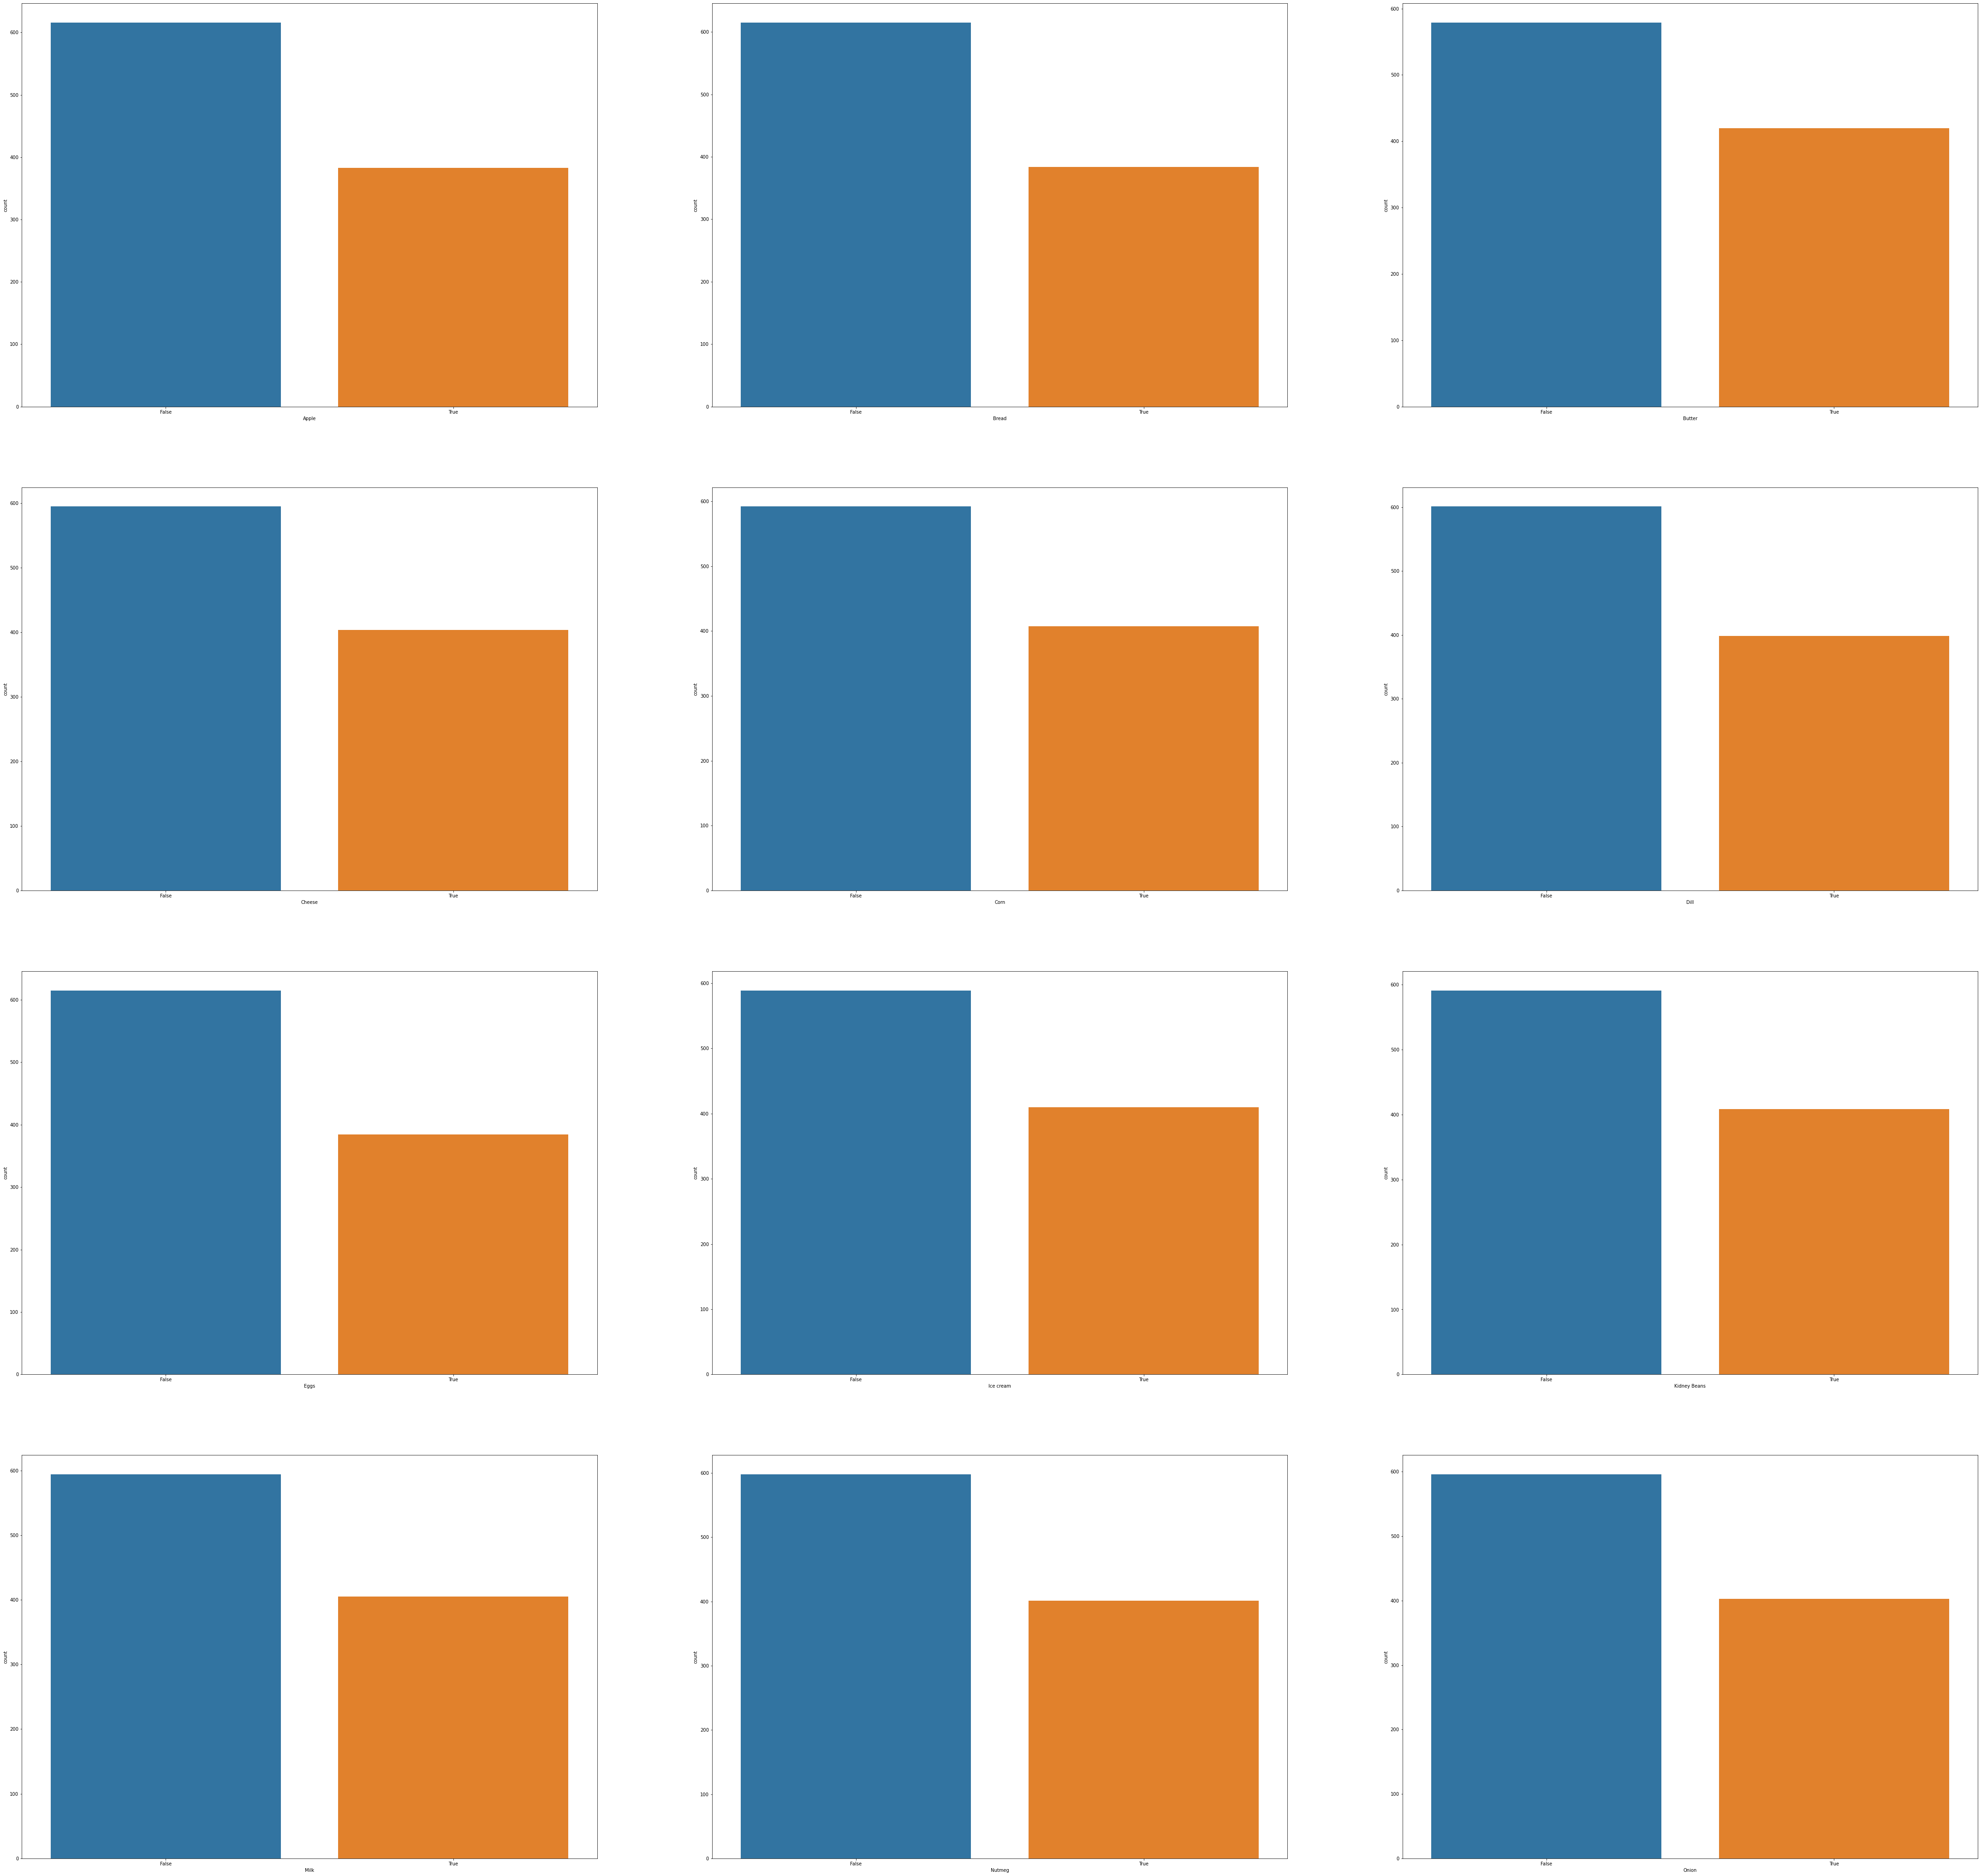

In [20]:
fig,ax=plt.subplots(4,3) 
count=0 
fig.set_figheight(74) 
fig.set_figwidth(76) 
for rows in range(4): 
    for cols in range(3): 
        sns.countplot(data=df,x=df.columns[count],ax=ax[rows][cols]) 
        count+=1 
        fig.show()

In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
df = pd.read_csv("basket_analysis.csv")

# Drop the first column (Unnamed)
df.drop(df.columns[0], axis=1, inplace=True)

# Create frequent itemsets using Apriori
frequent_itemsets = apriori(df,
                             min_support=0.006,
                             max_len=3,
                             use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets,
                          metric='support',
                          min_threshold=0.1)

# Filter rules based on criteria
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.2) &
                       (rules['lift'] > 1.0) &
                       (rules['support'] > 0.195)]

# Display the filtered rules
print(filtered_rules)


        antecedents     consequents  antecedent support  consequent support  \
66      (Ice cream)        (Butter)            0.410410            0.420420   
67         (Butter)     (Ice cream)            0.420420            0.410410   
68   (Kidney Beans)        (Butter)            0.408408            0.420420   
69         (Butter)  (Kidney Beans)            0.420420            0.408408   
70         (Butter)          (Milk)            0.420420            0.405405   
71           (Milk)        (Butter)            0.405405            0.420420   
72         (Butter)        (Nutmeg)            0.420420            0.401401   
73         (Nutmeg)        (Butter)            0.401401            0.420420   
74          (Onion)        (Butter)            0.403403            0.420420   
75         (Butter)         (Onion)            0.420420            0.403403   
76          (Sugar)        (Butter)            0.409409            0.420420   
77         (Butter)         (Sugar)            0.420